# **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import random as rd
import matplotlib.pyplot as plt
import os
from scipy import signal
import mne
import matplotlib.pyplot as plt

# **Loading signal**

In [ ]:
def read_signals_ucihar(filename):
    with open(filename, 'r') as fp:
        data = fp.read().splitlines()
        data = map(lambda x: x.rstrip().lstrip().split(), data)
        data = [list(map(float, line)) for line in data]
    return data

def read_labels_ucihar(filename):
    with open(filename, 'r') as fp:
        activities = fp.read().splitlines()
        activities = list(map(int, activities))
    return activities

def load_ucihar_data(folder):
    #folder='E:\Downloads\UCIHARDataset\UCIHARDataset'
    train_folder ="E:\\Downloads\\UCIHARDataset\\UCIHARDataset\\train\\Inertial Signals"

    test_folder = "E:\\Downloads\\UCIHARDataset\\UCIHARDataset\\test\\Inertial Signals"
    labelfile_train = "E:\\Downloads\\UCIHARDataset\\UCIHARDataset\\train\\y_train.txt"
    labelfile_test = "E:\\Downloads\\UCIHARDataset\\UCIHARDataset\\test\\y_test.txt"
    train_signals, test_signals = [], []
    for input_file in os.listdir(train_folder):
        signal = read_signals_ucihar(train_folder +"\\"+ input_file)
        train_signals.append(signal)
    train_signals = np.transpose(np.array(train_signals), (1, 2, 0))
    for input_file in os.listdir(test_folder):
        signal = read_signals_ucihar(test_folder +"\\"+ input_file)
        test_signals.append(signal)
    test_signals = np.transpose(np.array(test_signals), (1, 2, 0))
    train_labels = read_labels_ucihar(labelfile_train)
    test_labels = read_labels_ucihar(labelfile_test)
    return train_signals, train_labels, test_signals, test_labels

folder_ucihar = "E:\\Downloads\\UCIHARDataset\\UCIHARDataset"
train_signals_ucihar, train_labels_ucihar, test_signals_ucihar, test_labels_ucihar = load_ucihar_data(folder_ucihar)

In [ ]:
train_signals_ucihar.shape

(7352, 128, 9)

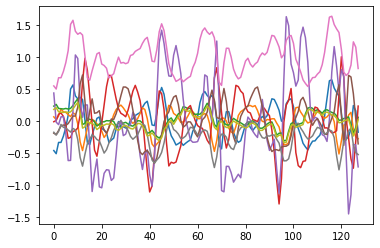

In [ ]:
plt.plot(train_signals_ucihar[100]) #9 trials

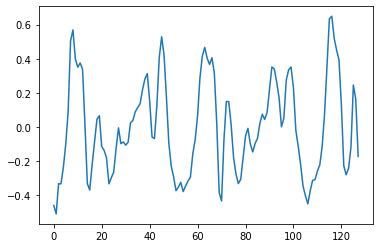

In [ ]:
plt.plot(train_signals_ucihar[100][:,0]) #first trial

In [ ]:
sig=np.concatenate((train_signals_ucihar[0],train_signals_ucihar[1],train_signals_ucihar[2],train_signals_ucihar[3],train_signals_ucihar[4],train_signals_ucihar[5][0:60]),axis=0)


In [ ]:
sig=sig[:,0:3] #three trials

In [ ]:
sig.shape

(700, 3)

In [ ]:
window_size=100
overlap=50
num_windows=(sig.shape[0]/100)*2-1

In [ ]:
windows=[]
center_time=[]
start=0
end=100
for j in range(sig.shape[1]):
    start=0
    end=100
    for i in range(int(num_windows)):
        windows.append(sig[int(start):int(end),j])
        center_time.append((start+end)/2)
        start+=overlap
        end+=overlap

In [ ]:
windows=np.array(windows)
windows.shape  #117=13*9 13wX9trails

(39, 100)

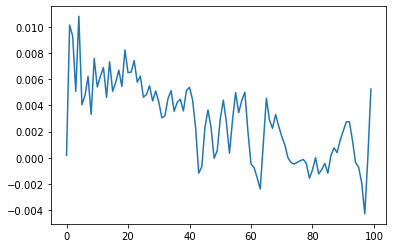

In [ ]:
plt.plot(windows[0])

# **DFT**

In [ ]:
def discrete_fourier_transform (x):

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)


    return X

In [ ]:
F_sig=[]
amp1=[]
amp2=[]
amp3=[]
phase1,phase2,phase3=[],[],[]
#trial1
for i in range(int(num_windows)):
    F_sig.append(discrete_fourier_transform(windows[i]-np.mean(windows[i])))
    norm =F_sig[i]/100
    amp1.append(abs(norm))
    phase1.append(np.angle(norm))
#trial2
for i in range(int(num_windows)):
    F_sig.append(discrete_fourier_transform(windows[i+13]-np.mean(windows[i+13])))
    norm =F_sig[i+13]/100
    amp2.append(abs(norm))
    phase2.append(np.angle(norm))
#trial3
for i in range(int(num_windows)):
    F_sig.append(discrete_fourier_transform(windows[i+26]-np.mean(windows[i+26])))
    norm =F_sig[i+26]/100
    amp3.append(abs(norm))
    phase3.append(np.angle(norm))

freq=np.arange(100)
F_sig=np.array(F_sig)
amp1=np.array(amp1)
amp2=np.array(amp2)
amp3=np.array(amp3)


phase3=np.array(phase3)
phase2=np.array(phase2)
phase1=np.array(phase1)

center_time=np.array(center_time)

<StemContainer object of 3 artists>

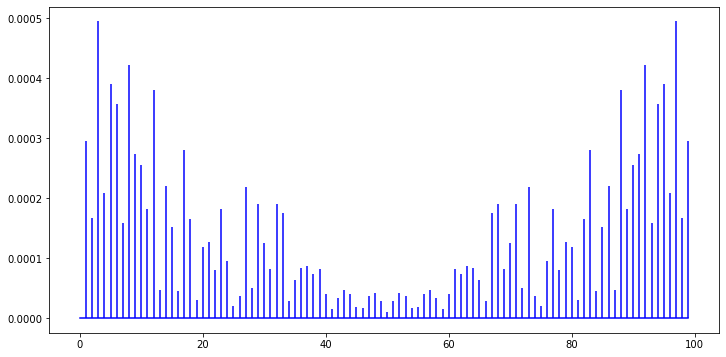

In [ ]:
plt.figure(figsize = (12, 6))
#plt.xlim(0,10)

plt.stem(freq, amp1[1], 'b', \
         markerfmt=" ", basefmt="-b")

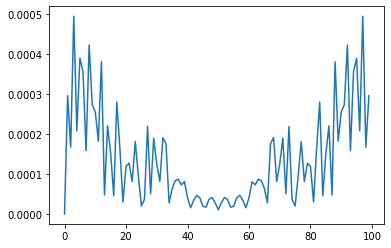

In [ ]:
plt.plot(amp1[1])

# **color coding**

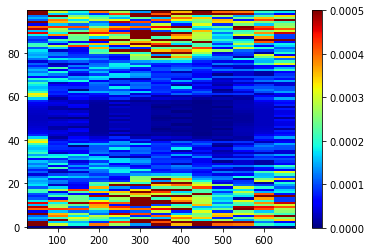

In [ ]:
plt.pcolormesh(center_time[0:13],freq,amp1.T, vmin = 0, vmax =0.0005,cmap='jet',shading='nearest')

plt.colorbar()
plt.show()

# **Baseline correction**

In [ ]:
mean1=[]
mean2=[]
mean3=[]

for i in range(13):
    mean1.append(np.mean(amp1[i]))
    mean2.append(np.mean(amp2[i]))
    mean3.append(np.mean(amp3[i]))

mean1=np.array(mean1)
mean2=np.array(mean2)
mean3=np.array(mean3)

mean1.shape

(13,)

In [ ]:
bl_correction1=[]
bl_correction2=[]
bl_correction3=[]
for i in range(13):
    bl_correction1.append(amp1[i]-mean1[i])
    bl_correction2.append( amp2[i]-mean2[i])
    bl_correction3.append(amp3[i]-mean3[i])
bl_correction1=np.array(bl_correction1)
bl_correction2=np.array(bl_correction2)
bl_correction3=np.array(bl_correction3)
bl_correction1.shape

(13, 100)

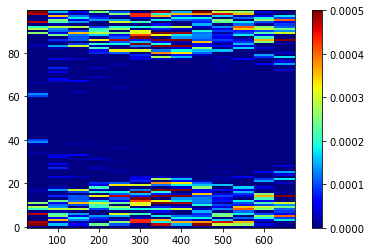

In [ ]:
plt.pcolormesh(center_time[0:13],freq,bl_correction1.T, vmin = 0, vmax =0.0005,cmap='jet',shading='nearest')

plt.colorbar()
plt.show()

In [ ]:
avg_trials=(bl_correction1+bl_correction2+bl_correction3)/3
avg_trials.shape

(13, 100)

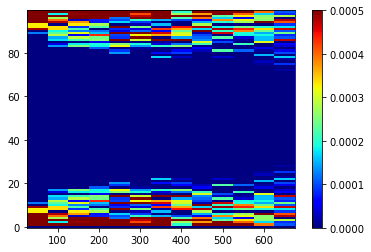

In [ ]:
plt.pcolormesh(center_time[0:13],freq,avg_trials.T, vmin = 0, vmax =0.0005,cmap='jet',shading='nearest')

plt.colorbar()
plt.show()

# **Baseline correction sec**

In [ ]:
avg_trials2=(amp1+amp2+amp3)/3
avg_trials2.shape

(13, 100)

In [ ]:
bl_correction=[]
for i in range(13):
    bl_correction.append(avg_trials2[i]-np.mean(avg_trials2[i]))
bl_correction=np.array(bl_correction)

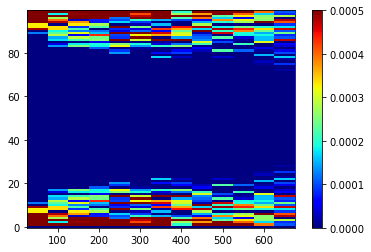

In [ ]:

plt.pcolormesh(center_time[0:13],freq,bl_correction.T, vmin = 0, vmax =0.0005,cmap='jet',shading='nearest')

plt.colorbar()
plt.show()


# **Percent change**

In [ ]:
percent_change1=[]
percent_change2=[]
percent_change3=[]
for i in range(13):
    percent_change1.append(((amp1[i]-mean1[i])/mean1[i])*100)
    percent_change2.append(((amp2[i]-mean2[i])/mean2[i])*100)
    percent_change3.append(((amp3[i]-mean3[i])/mean3[i])*100)
percent_change1=np.array(percent_change1)
percent_change2=np.array(percent_change2)
percent_change3=np.array(percent_change3)
percent_change1.shape

(13, 100)

In [ ]:
np.mean(percent_change1)

1.7490282726402466e-16

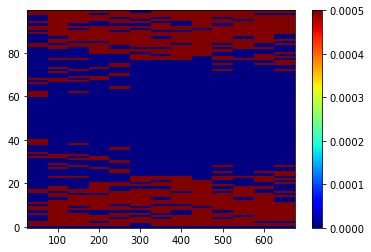

In [ ]:
plt.pcolormesh(center_time[0:13],freq,percent_change1.T, vmin = 0, vmax =0.0005,cmap='jet',shading='nearest')

plt.colorbar()
plt.show()

# **ITPC**

In [ ]:
avg=(np.exp(1j*phase1)+np.exp(1j*phase2)+np.exp(1j*phase3))/3
avg

array([[ 0.33333333+4.08215600e-17j,  0.57141408-7.38172288e-01j,
         0.38925645-8.82227931e-01j, ...,  0.30741118+8.74010664e-01j,
         0.38925645+8.82227931e-01j,  0.57141408+7.38172288e-01j],
       [-0.33333333+8.16431199e-17j, -0.11268445+4.09226355e-01j,
        -0.12358007-3.84341381e-01j, ...,  0.45892202+6.09579830e-02j,
        -0.12358007+3.84341381e-01j, -0.11268445-4.09226355e-01j],
       [ 0.33333333+4.08215600e-17j,  0.35576801+1.48167135e-02j,
        -0.3711115 +3.65090805e-02j, ..., -0.15243256-6.55192508e-01j,
        -0.3711115 -3.65090805e-02j,  0.35576801-1.48167135e-02j],
       ...,
       [ 0.33333333+4.08215600e-17j,  0.47500763+3.24880811e-01j,
         0.24336349-1.43288262e-01j, ...,  0.51291146-4.98707661e-01j,
         0.24336349+1.43288262e-01j,  0.47500763-3.24880811e-01j],
       [-0.33333333+8.16431199e-17j, -0.53719847+8.20153043e-01j,
        -0.91545969+2.80863573e-01j, ..., -0.32357929-8.70846636e-02j,
        -0.91545969-2.80863573e-01j

In [ ]:
abs(avg)

array([[0.33333333, 0.93349471, 0.96428559, ..., 0.92649678, 0.96428559,
        0.93349471],
       [0.33333333, 0.4244573 , 0.40372061, ..., 0.4629528 , 0.40372061,
        0.4244573 ],
       [0.33333333, 0.35607641, 0.37290301, ..., 0.6726908 , 0.37290301,
        0.35607641],
       ...,
       [0.33333333, 0.57548222, 0.28241337, ..., 0.71539324, 0.28241337,
        0.57548222],
       [0.33333333, 0.98042502, 0.95757547, ..., 0.33509297, 0.95757547,
        0.98042502],
       [1.        , 0.89053063, 0.2952858 , ..., 0.28147993, 0.2952858 ,
        0.89053063]])

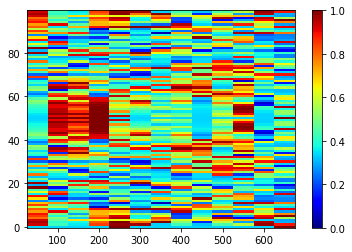

In [ ]:
plt.pcolormesh(center_time[0:13],freq,abs(avg).T, vmin = 0, vmax =1,cmap='jet',shading='nearest')

plt.colorbar()
plt.show()